In [3]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [6]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [7]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

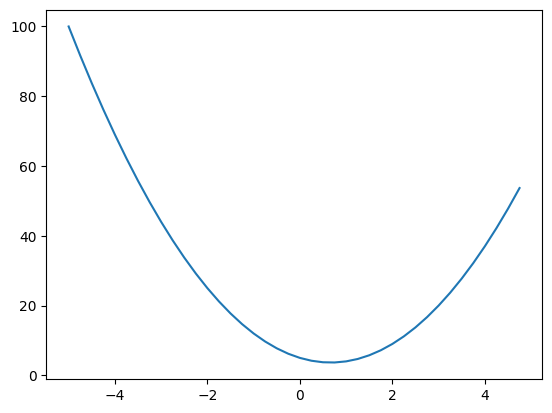

In [8]:
plt.plot(xs, ys)

In [ ]:
# derivative to get slope
h = 0.00000000001
x = -3.0
(f(x+h) - f(x)) / h 

-21.999824184604222

In [16]:
# lets get more complex
a = 2.0 
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [17]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c

print('d1', d1)
print("d2", d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

In [19]:
Value(2.0)

Value(data=2.0)

In [21]:
a = Value(2.0)
b = Value(-3.0)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [119]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), "tanh")
        return out


a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a * b
e.label='e'
d = e + c
d.label='d'
f = Value(-2.0, label='f')
L = d*f
L.label="L"
L

Value(data=-8.0)

In [106]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [107]:
d._op

'+'

In [6]:
from graphviz import Digraph

def trace(root):
    """Builds set of all nodes and edges in a graph"""
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
        for child in v._prev:
            edges.add((child,v))
            build(child)

    build(root)
    return nodes, edges

def draw_root(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes: 
        uid = str(id(n))
        # for any value in graph, create a rectangular 'record' node for it
        dot.node(name=uid, label= "{%s | data: %.4f | grad: %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label= n._op)
            # add connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

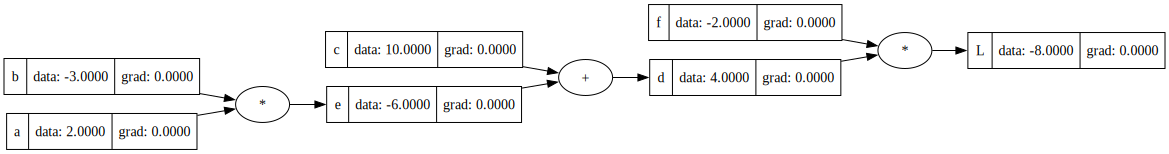

In [109]:
draw_root(L)

In [110]:
# this represents L wrt a (by gradient)
def local_a():
    h = 0.001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f ; L.label = "L"
    L1 = L.data

    a = Value(2.0 + h, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f ; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)

local_a()

6.000000000000227


In [111]:
# changin L by h is 1.
def local_l():
    h = 0.001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"
    L2 = L.data + h

    print((L2 - L1) / h)


local_l()

1.000000000000334


In [112]:
L.grad = 1.0 

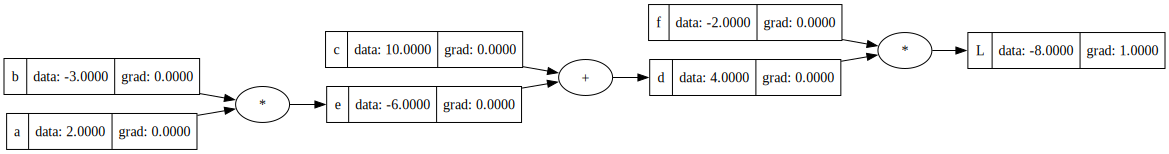

In [113]:
draw_root(L)

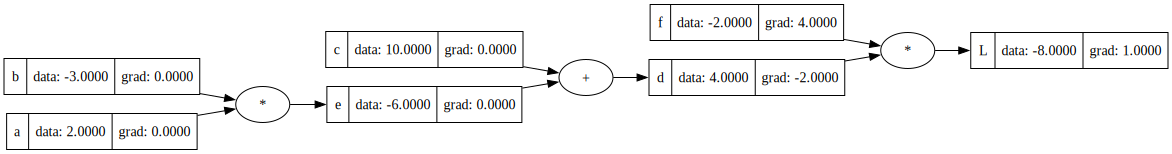

In [114]:
# L = d * f
# we want dL/dd =? f
# (f(x+h) - f(x)) / h

# ( (d+h)f - d*f ) /h
# expanding
# d*f + h*f - d*f / h
# h*f/h
# f

# hence dL/dd = f
f.grad = 4.0
d.grad = -2.0
draw_root(L)
# we can do changes in each value in function local() to get gradients

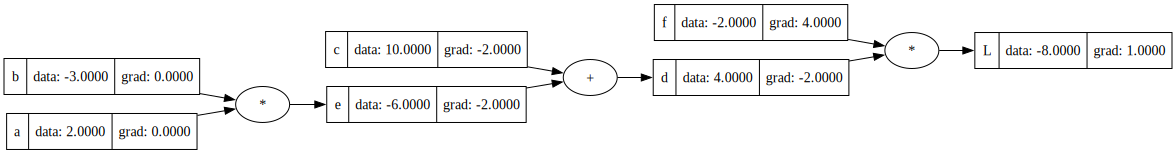

In [115]:
# L = d * f
# we want dd/dc =? 1.0
# d = c + 3

# (f(x+h) - f(x)) / h

# ( (c+h)+e - c+e ) /h
# expanding
# c+h+e-c-e / h
# h/h
# 1.0

# dd/de will also be 1.0

# But we want dL/de and dL/dc
# CHAIN RULE : dz/dx = dz/dy * dy/dx
# hence :
# dL/dc = dL/dd * dd/dc
# dL/dc = -2.0 * 1.0 = -2.0

c.grad = -2.0
e.grad = -2.0
draw_root(L)

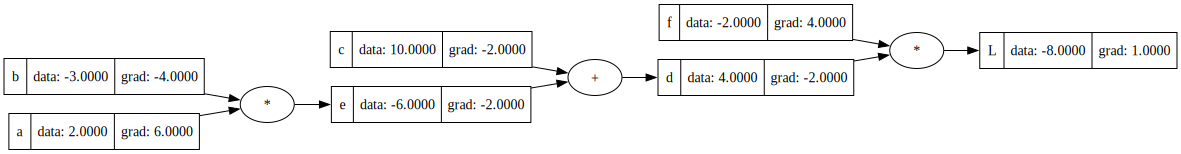

In [116]:
# we KNOW dL/de
# we WANT dL/da ??
# dL/da = dL/de * de/da
# we get de/da = b
# dL/da = dL/de * de/da = -2.0 * 3.0

# dL/db = dL/de * de/db = -2.0 * 2.0
a.grad = -2.0 * -3.0 
b.grad = -2.0 * 2.0
draw_root(L)

In [117]:
# notching up values in direction of gradients 
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
d.data += 0.01 * d.grad

e = a*b
d = e+c
L = d*f

# expect less negative L, expect it to go up!!
print(L.data)

-7.4352


## neuron

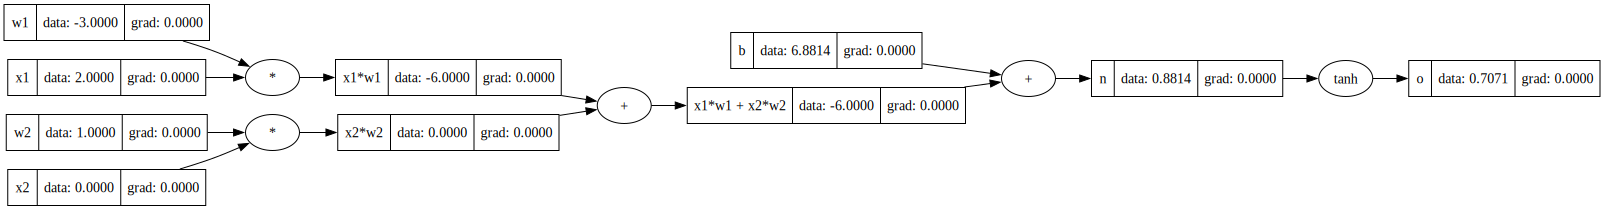

In [131]:
# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
o = n.tanh()
o.label = "o"

draw_root(o)

In [132]:
o.grad = 1.0

In [133]:
# o = tanh(n)
# what is do/dn
# do/dn = 1 - tanh(n)**2
# do/dn = 1 - o**2
1 - o.data**2

0.4999999999999999

In [134]:
n.grad = 0.5

In [135]:
# adding of values have derivative of 1 so 1* 0.5(of n.grad)
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [136]:
# plus again
x1w1.grad = 0.5 
x2w2.grad = 0.5


In [137]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [139]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

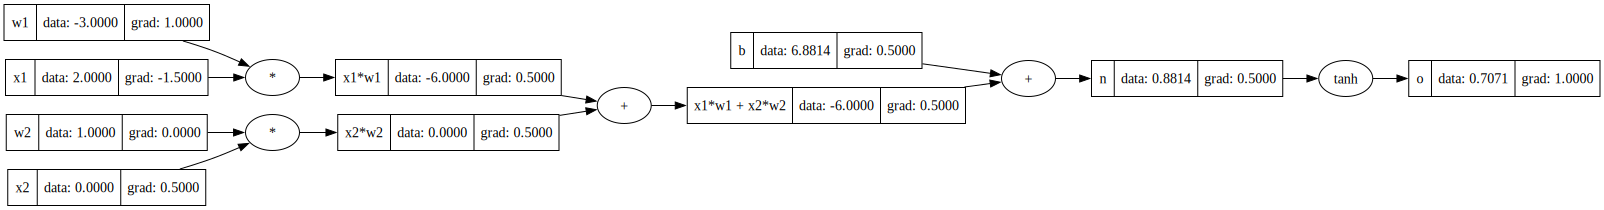

In [140]:
draw_root(o)

# implementing backprop

In [4]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(
        self, other
    ):  # Python remembers self and other because _backward is a closure. 
        # A function that remembers the variables around it, even after the outer function has finished.
        # _backward remembers:
        # - which self it belongs to
        # - which other it belongs to
        # - which out it belongs to
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward  # The (n+1) node calls its _backward() to update the gradients of the n nodes that created it

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad 
        out._backward = _backward

        return out

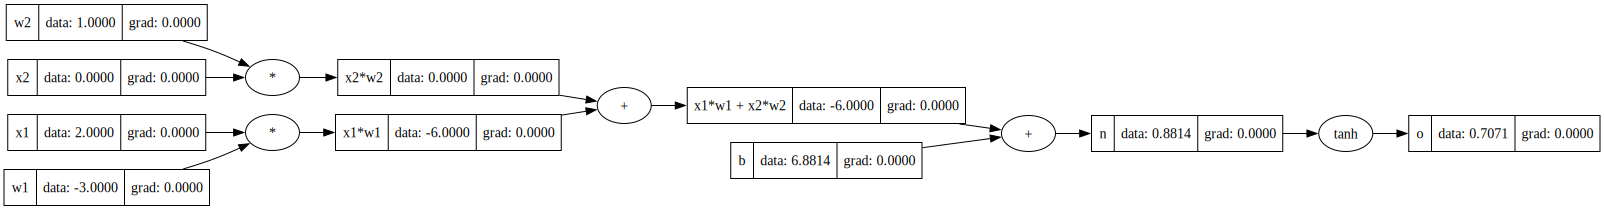

In [7]:
# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
o = n.tanh()
o.label = "o"

draw_root(o)

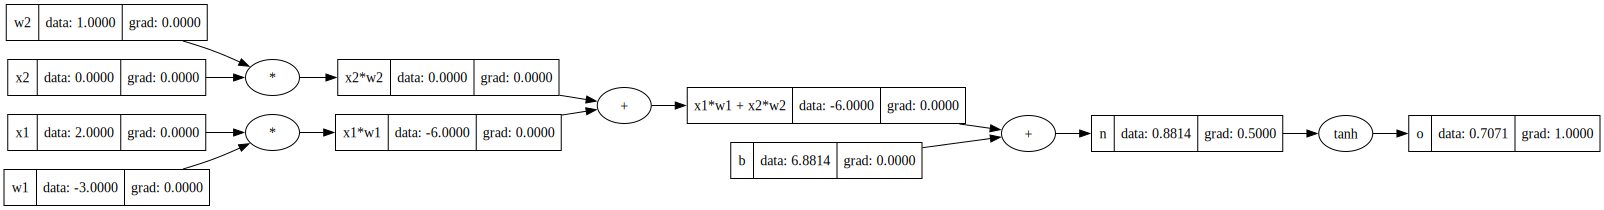

In [156]:
# initilaised to 0 , convert to 1.0
o.grad = 1.0 
o._backward()
draw_root(o)

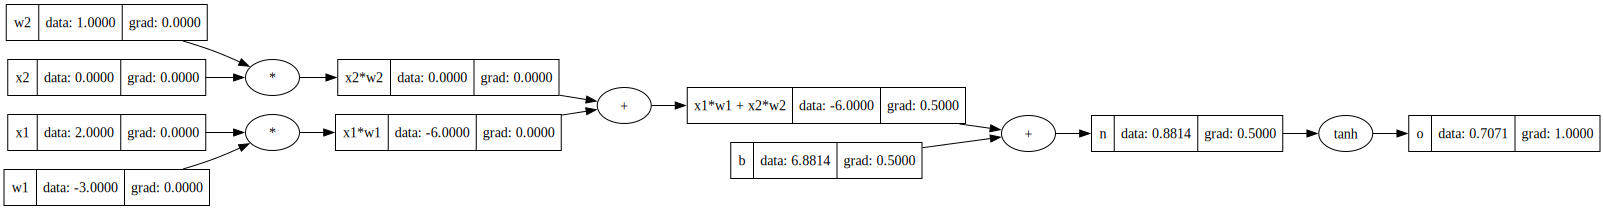

In [157]:
n._backward()
draw_root(o)

In [158]:
b._backward() # leaf node , nothing happens. None initialised

AttributeError: 'Value' object has no attribute '_backward'

In [159]:
x1w1x2w2._backward()

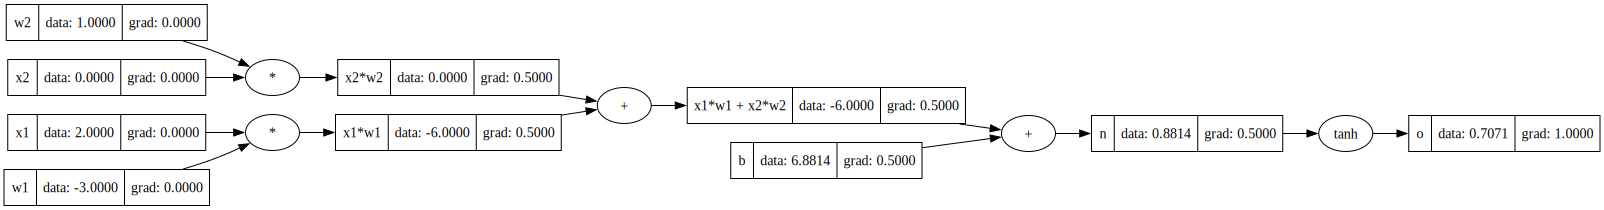

In [160]:
draw_root(o)

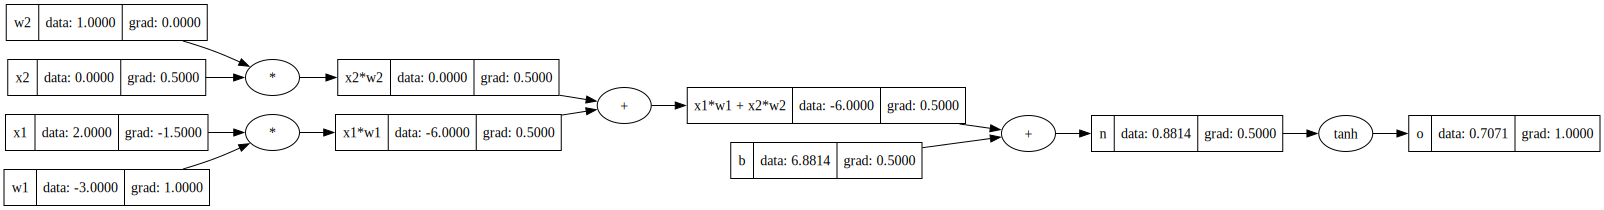

In [161]:
x2w2._backward()
x1w1._backward()
draw_root(o)

In [11]:
topo = []
visited = set()
# building topological structure, last being added last 
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [12]:
for node in reversed(topo):
    node._backward()

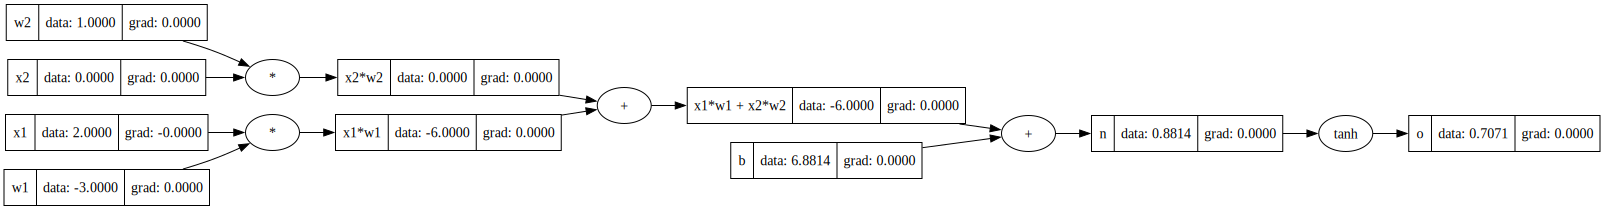

In [13]:
draw_root(o)

# backward

In [17]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(
        self, other
    ):  # Python remembers self and other because _backward is a closure.
        # A function that remembers the variables around it, even after the outer function has finished.
        # _backward remembers:
        # - which self it belongs to
        # - which other it belongs to
        # - which out it belongs to
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward  # The (n+1) node calls its _backward() to update the gradients of the n nodes that created it

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        # building topological structure, last being added last
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0 

        for node in reversed(topo):
            node._backward()

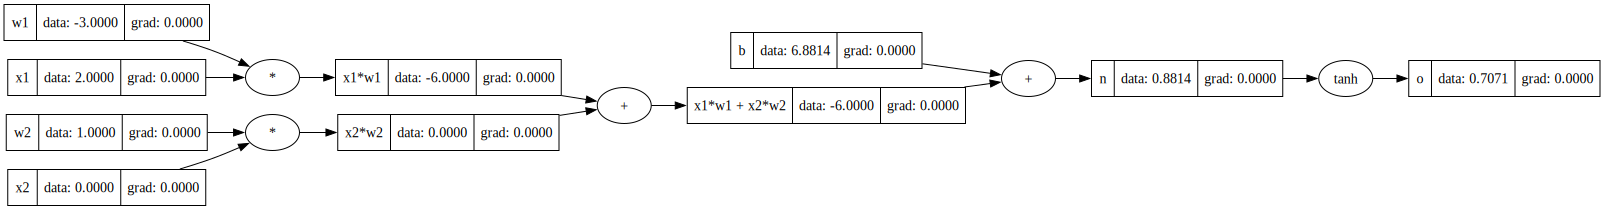

In [18]:
# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
o = n.tanh()
o.label = "o"

draw_root(o)

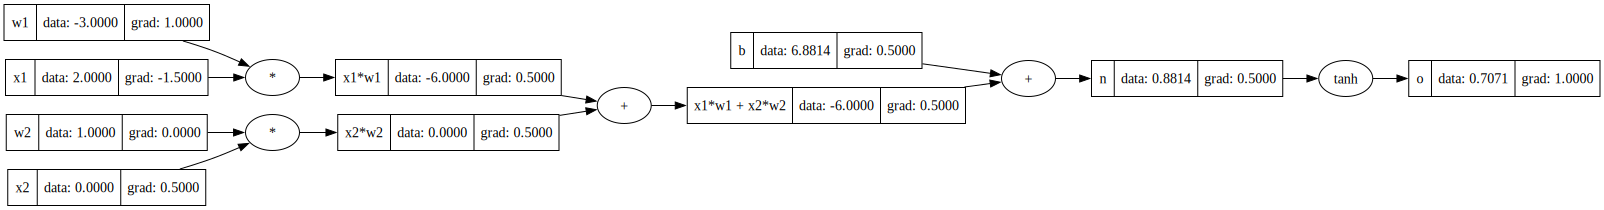

In [19]:
o.backward()
draw_root(o)

# bug 

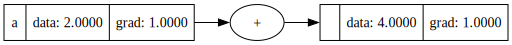

In [ ]:
a = Value(2.0, label='a')
b = a + a 
b.backward()
draw_root(b) # THIS IS WRONG 
# IT SHOULD GIVE 1+1 GRAD NOT ONLY 1 
# HAPPENING BEVAUSE SELF.GRAD AND OTHER.GRAD ARE SETTING ITSELF TO 1 

# WHEN EVER WE CALL A VARIABLE IS USED TWICE IT OVERWRITES THEM 
# WE NEED TO ACCUMULATE GRADIENTS NOT OVERWRITE 

In [21]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(
        self, other
    ):  # Python remembers self and other because _backward is a closure.
        # A function that remembers the variables around it, even after the outer function has finished.
        # _backward remembers:
        # - which self it belongs to
        # - which other it belongs to
        # - which out it belongs to
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward  # The (n+1) node calls its _backward() to update the gradients of the n nodes that created it

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        # building topological structure, last being added last
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

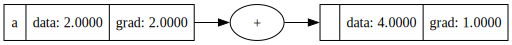

In [22]:
a = Value(2.0, label="a")
b = a + a
b.backward()
draw_root(b)

In [23]:
a = Value(2.0, label="a")
a + 1 

AttributeError: 'int' object has no attribute 'data'

In [37]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(
        self, other
    ):  # Python remembers self and other because _backward is a closure.
        # A function that remembers the variables around it, even after the outer function has finished.
        # _backward remembers:
        # - which self it belongs to
        # - which other it belongs to
        # - which out it belongs to
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward  # The (n+1) node calls its _backward() to update the gradients of the n nodes that created it

        return out

    def __neg__(self): # -self
        return self * -1

    def __sub__(self,other):
        return self + (-other)

    def __truediv__(self, other): # self/other
        return self * other**-1

    def __rmul__(self,other): # other * self # reflected multiplication 
        return self * other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)) # only supported int/float for now
        out = Value(self.data**other, (self, ),f'**{other}') 

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad
        out._backward = _backward
        return out

    def exp(self):
        x = self.data 
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        # building topological structure, last being added last
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [38]:
a = Value(2.0, label="a")
a + 1

Value(data=3.0)

In [39]:
a = Value(2.0, label="a")
2 * a
# 2.__mul__a , self and other are exchanged

Value(data=4.0)

In [40]:
a = Value(2.0, label="a")
b = Value(4.0, label="a")
# division
# a/b 
# a * (1/b)
# a * (b**-1)

# generalise to 
# x**k

a/b

Value(data=0.5)

In [41]:
a- b

Value(data=-2.0)

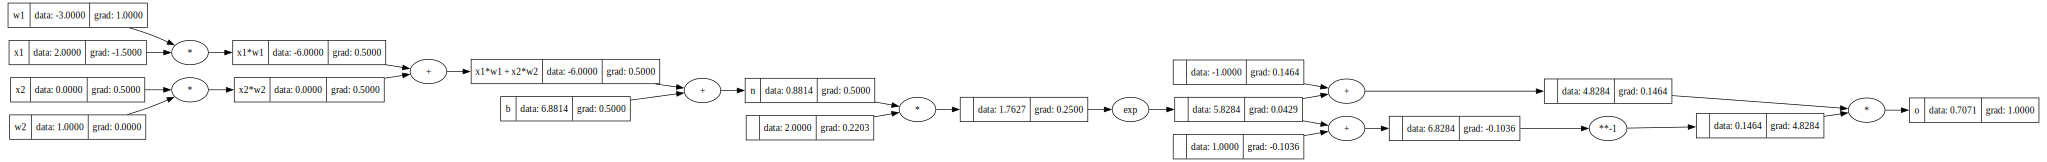

In [43]:
# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
# ---- changed -----
e = (2*n).exp()
o = (e-1)/(e+1)
# -------------
o.label = "o"
o.backward()
draw_root(o)

# pytorch 

In [44]:
import torch

x1 = torch.Tensor([2.0]).double()
x2 = torch.Tensor([0.0]).double()
w1 = torch.Tensor([-3.0]).double()
w2 = torch.Tensor([1.0]).double()
b = torch.Tensor([6.8813735870195432]).double()

x1.requires_grad = True
x2.requires_grad = True
w1.requires_grad = True
w2.requires_grad = True
b.requires_grad = True

n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)

print(o.data.item())

o.backward()

print("---")
print("x2", x2.grad.item())
print("w2", w2.grad.item())
print("x1", x1.grad.item())
print("w1", w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [45]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [46]:
o.item()

0.7071066904050358

In [ ]:
o.grad

/var/folders/g9/64n80gs13d13qhs7rbzhkps00000gn/T/ipykernel_25577/3391283232.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  o.grad


In [53]:
w1.grad.item()

1.0000002567688737

# Neuron

In [97]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(
        self, other
    ):  # Python remembers self and other because _backward is a closure.
        # A function that remembers the variables around it, even after the outer function has finished.
        # _backward remembers:
        # - which self it belongs to
        # - which other it belongs to
        # - which out it belongs to
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward  # The (n+1) node calls its _backward() to update the gradients of the n nodes that created it

        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __neg__(self):  # -self
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __truediv__(self, other):  # self/other
        return self * other**-1

    def __rmul__(self, other):  # other * self # reflected multiplication
        return self * other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float))  # only supported int/float for now
        out = Value(self.data**other, (self,), f"**{other}")

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp")

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        # building topological structure, last being added last
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [98]:
import random

In [99]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x): # Neuron(x)
        # w * x + b 
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out


x = [2.0, 3.0]
# Eeach neuron takes 2 inputs.
n = Neuron(2)
n(x)

Value(data=0.9952402165911683)

In [100]:
# x0 ──▶ (× w0) ──┐
#                 ├──▶  n = w0·x0 + w1·x1 + b  ──▶ tanh(n) = out
# x1 ──▶ (× w1) ──┘
#                   ▲
#                   │
#                   b
# n = w0 * x0 + w1 * x1 + b
# out = tanh(n)

In [101]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):  # Neuron(x)
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x): 
        outs = [n(x) for n in self.neurons]
        return outs


x = [2.0, 3.0]
# This is 1 layer with 3 neurons, and each neuron takes 2 inputs.
n = Layer(2,3)
n(x)

[Value(data=0.7665663235760741),
 Value(data=-0.4508108103291502),
 Value(data=0.9846446293860748)]

In [143]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):  # Neuron(x)
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

    def parameters(self):
        # return [p for neuron in self.neurons for p in neuron.parameters() ]
        params = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params


class MLP:
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nout))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [144]:
x = [2.0, 3.0, -1.0]
# Build a network that:
# takes 3 inputs
# has 3 layers
# layer 1: 4 neurons
# layer 2: 4 neurons
# layer 3: 1 neuron”
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.3087907570956799)

In [145]:
n.parameters()

[Value(data=-0.1633118000281939),
 Value(data=-0.7984864328715842),
 Value(data=-0.16522294124423476),
 Value(data=0.0749697315123663),
 Value(data=-0.618395955556273),
 Value(data=-0.08333686053824718),
 Value(data=0.06358385112344944),
 Value(data=-0.3184877075894772),
 Value(data=-0.4115230868221782),
 Value(data=-0.995224773537186),
 Value(data=-0.33477524820104554),
 Value(data=-0.41612644285926037),
 Value(data=-0.38436728691507827),
 Value(data=0.8293187729084743),
 Value(data=-0.8964332754311195),
 Value(data=0.537128470144868),
 Value(data=0.912163189625159),
 Value(data=-0.23717494734517075),
 Value(data=0.7026766329325065),
 Value(data=0.11079740400594096),
 Value(data=0.0563749948750254),
 Value(data=-0.09035535995058619),
 Value(data=-0.05101300758158134),
 Value(data=0.6901032506801594),
 Value(data=0.7547214407034377),
 Value(data=-0.18610761779100682),
 Value(data=0.1657058302194876),
 Value(data=-0.8649230698427606),
 Value(data=-0.7839381485091852),
 Value(data=-0.637

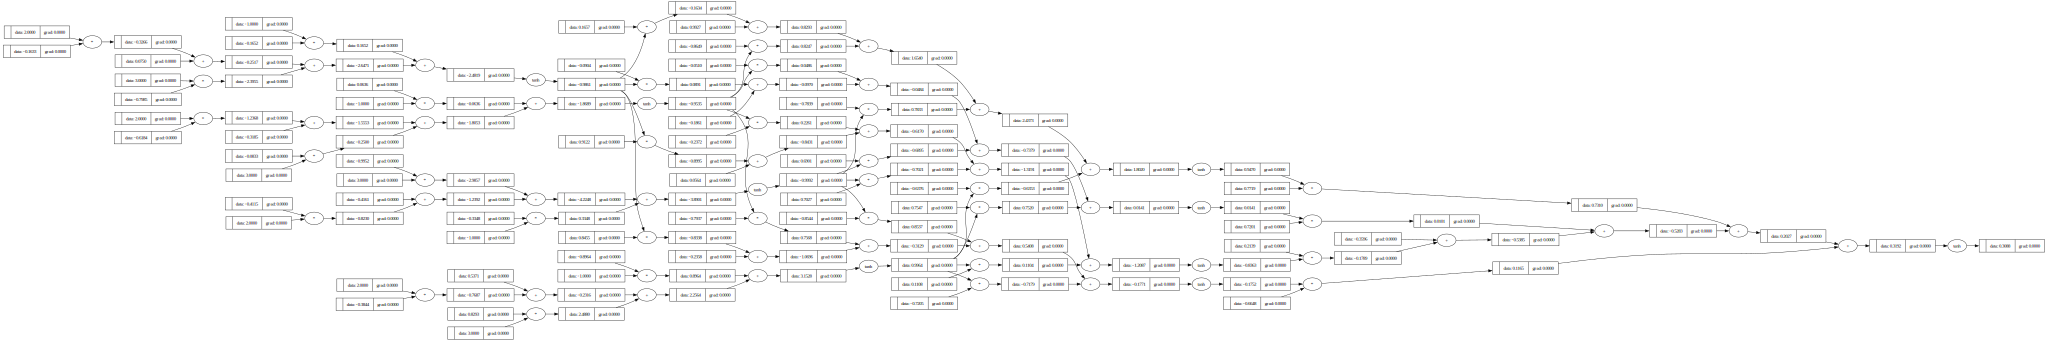

In [146]:
draw_root(n(x))

In [147]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]
y_pred = [n(x) for x in xs]
y_pred

[Value(data=0.3087907570956799),
 Value(data=-0.7014364159064262),
 Value(data=-0.28096562649438744),
 Value(data=0.24216310340934838)]

In [148]:
[(yout - ygt) ** 2 for ygt, yout in zip(ys, y_pred)]

[Value(data=0.4777702174763635),
 Value(data=0.08914021374680049),
 Value(data=0.5170104302826088),
 Value(data=0.57431676183415)]

In [149]:
loss = sum(((yout - ygt) ** 2 for ygt, yout in zip(ys, y_pred)))
loss

Value(data=1.658237623339923)

In [150]:
n.layers[0].neurons[0].w[0].grad

0.0

In [151]:
loss.backward()

In [152]:
n.layers[0].neurons[0].w[0].grad

0.456063296145887

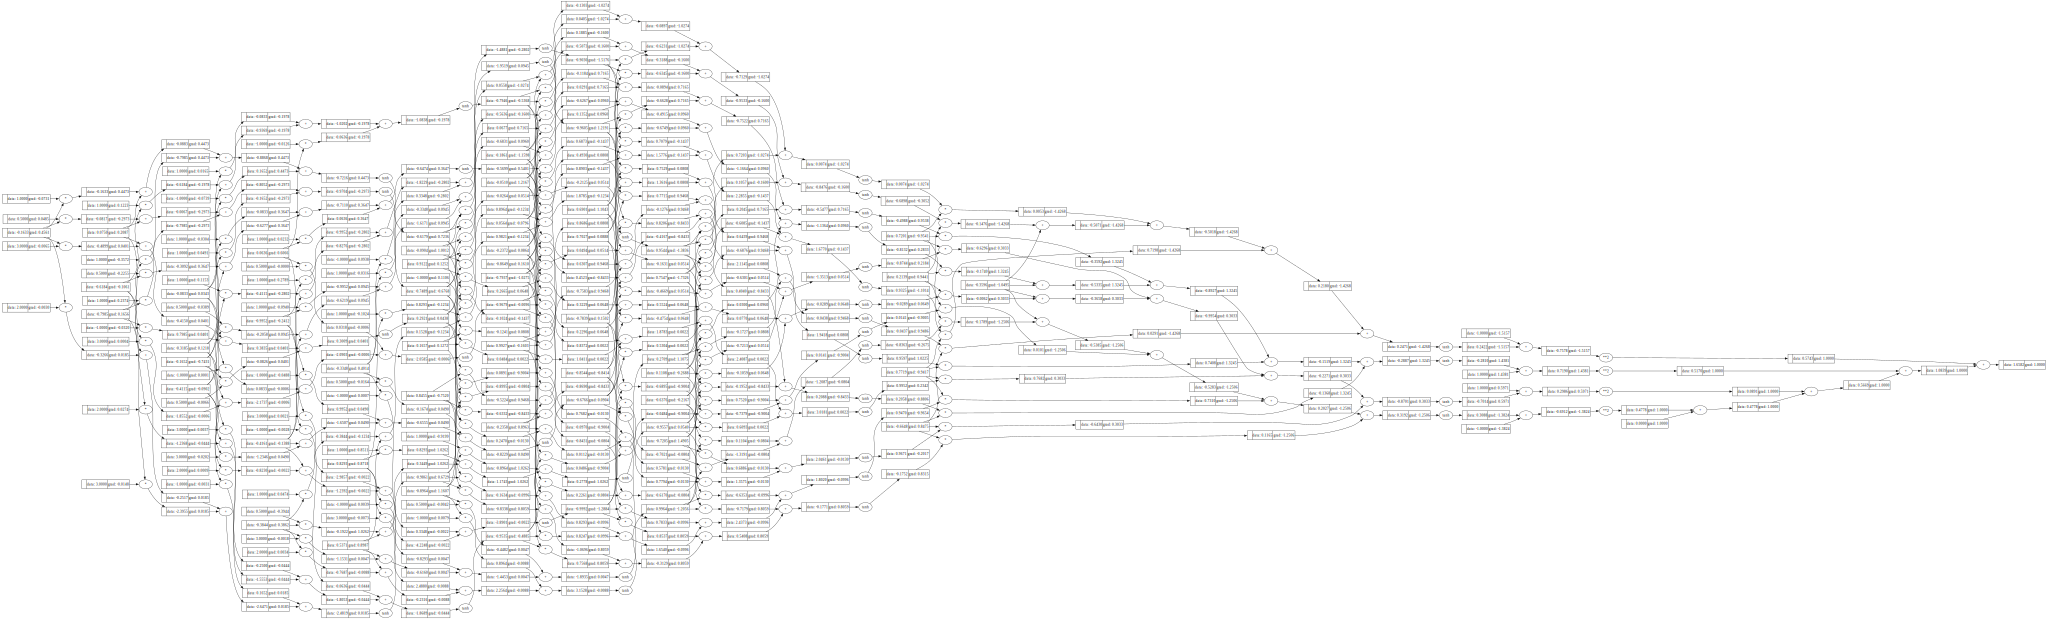

In [153]:
draw_root(loss)

In [154]:
n.layers[0].neurons[0].w[0].grad

0.456063296145887

In [155]:
n.layers[0].neurons[0].w[0].data

-0.1633118000281939

In [156]:
for p in n.parameters():
    # decrease loss 
    p.data += -0.01 * p.grad

In [157]:
n.layers[0].neurons[0].w[0].data

-0.16787243298965276

In [158]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]
y_pred = [n(x) for x in xs]
loss = sum(((yout - ygt) ** 2 for ygt, yout in zip(ys, y_pred)))
loss # less loss now becuase we updated parameters

Value(data=1.4569647994444996)

In [159]:
for k in range(20):
    # forward pass
    y_pred = [n(x) for x in xs]
    loss = sum(((yout - ygt) ** 2 for ygt, yout in zip(ys, y_pred)))

    # ZERO THE GRAD (flush)
    for p in n.parameters():
        p.grad =0.0

    # backward pass
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad

    print(k, loss.data)

0 1.4569647994444996
1 0.901613049175974
2 0.5554778283638381
3 0.3592331052470769
4 0.2613124281210397
5 0.20520936481885146
6 0.1678442038169285
7 0.14138935157105226
8 0.12178331604600456
9 0.10672743880822316
10 0.09483413192352766
11 0.08522078809749484
12 0.07730133838332903
13 0.07067243038512137
14 0.0650479459065604
15 0.060219621585475
16 0.05603245049929436
17 0.05236880367811131
18 0.049137882481191136
19 0.046268533357519466
